In [1]:
def f(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
def grad(x, y):
    dx = 2 * x - 2 + 100 * (-4 * y * x + 4 * x ** 3)
    dy = 100 * (2 * y - 2 * x ** 2)
    return (dx, dy)

In [14]:
def dist(x1, x2):
    return (x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2

In [19]:
x0 = (0, 2)
gamma = 1e-6
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if dist(x_new, x_cur) < 1e-9:
    # if i > 5000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

 0.18); f(x)=3.32; grad f(x)=(-10.42, 32.06)
iter=12316; x=(0.14, 0.18); f(x)=3.32; grad f(x)=(-10.42, 32.05)
iter=12317; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.42, 32.04)
iter=12318; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.42, 32.04)
iter=12319; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.42, 32.03)
iter=12320; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.42, 32.02)
iter=12321; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.41, 32.02)
iter=12322; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.41, 32.01)
iter=12323; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.41, 32.00)
iter=12324; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.41, 32.00)
iter=12325; x=(0.14, 0.18); f(x)=3.31; grad f(x)=(-10.41, 31.99)
iter=12326; x=(0.14, 0.18); f(x)=3.30; grad f(x)=(-10.41, 31.98)
iter=12327; x=(0.14, 0.18); f(x)=3.30; grad f(x)=(-10.41, 31.98)
iter=12328; x=(0.14, 0.18); f(x)=3.30; grad f(x)=(-10.41, 31.97)
iter=12329; x=(0.14, 0.18); f(x)=3.30; grad f(x)=(-10.40, 31.96)
iter=12330; x=(0.14, 0.18); f(x)=3.30; grad f

In [16]:
import matplotlib.pyplot as plt
import numpy as np

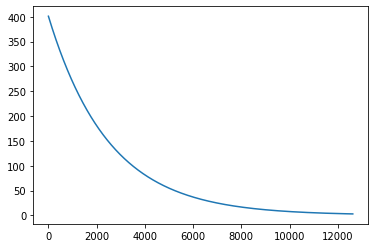

In [20]:
plt.plot(vals)

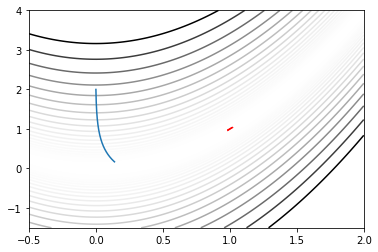

In [21]:
n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-0.5; b=2. # extreme points in the x-axis
c=-1.5; d=4. # extreme points in the y-axis
X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(-0.5, 3, 31),cmap='gray_r')
plt.plot([c[0] for c in coords], [c[1] for c in coords])
plt.scatter(1,1,c='red')



In [25]:
from scipy import optimize

In [26]:
def f_for_scipy(x):
    return f(x[0], x[1])

In [22]:
optimize.minimize(lambda x: f(*x), x0=(0, 0)) 

      fun: 2.8440316101421118e-11
 hess_inv: array([[0.49482454, 0.98957634],
       [0.98957634, 1.98394215]])
      jac: array([ 3.98673709e-06, -2.84416559e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])